<a href="https://colab.research.google.com/github/sbb2002/Portfolio/blob/main/.study/PyTorch/pytorch_ch01_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor

1D는 선이고, 2D는 평면이고, 3D는 정육면체, 4D는 테서랙트(초입방체)... 나에게는 아주 익숙한 단어들이다. 그런데 여기서도 텐서를 표시하다보니 6D까지 확장되는 일이 있기도 하다. 어쨌든 NN 분야에서 3D 텐서는 다음과 같은 특징을 갖는다.
> $
|t| = \text{(batch_size, width, height) at typical vision} \
= \text{(batch_size, length, dim) at NN}
 $

## Setting

In [ ]:
!git clone https://github.com/sbb2002/PyTorch.git

Cloning into 'PyTorch'...
remote: Enumerating objects: 1899, done.
remote: Total 1899 (delta 0), reused 0 (delta 0), pack-reused 1899
Receiving objects: 100% (1899/1899), 80.33 MiB | 25.48 MiB/s, done.
Resolving deltas: 100% (242/242), done.


In [ ]:
!find -name requirements.txt

./PyTorch/requirements.txt


In [ ]:
!pip install -r ./PyTorch/requirements.txt

     |████████████████████████████████| 686kB 2.8MB/s 
     |████████████████████████████████| 71kB 6.3MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp37-none-any.whl size=655251 sha256=68d5fb17f261994099da2f3df1c10130bc8f1b0c0b10eac456910bf9189644a0
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp37-none-any.whl size=5713 sha256=5b21664fbc32a7be69e98b1d53736f649b46ad7262da993db3348744cbbcaf4e
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


## Practice

In [ ]:
import numpy as np
import torch

In [ ]:
# 1D array with numpy
t = np.array([0., 1., 2., 3., 4., 5., 6.,])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [ ]:
print("Rank: ", t.ndim)
print("Shape: ", t.shape)

Rank:  1
Shape:  (7,)


In [ ]:
print("t[0] t[1] t[-1] = ", t[0], t[1], t[-1])    # elemnet
print("t[2:5] t[4:-1] = ", t[2:5], t[4:-1])       # slicing
print("t[:2] t[3:] = ", t[:2], t[3:])

t[0] t[1] t[-1] =  0.0 1.0 6.0
t[2:5] t[4:-1] =  [2. 3. 4.] [4. 5.]
t[:2] t[3:] =  [0. 1.] [3. 4. 5. 6.]


In [ ]:
# 2D array with numpy
t = np.array([[1., 2., 3.],
              [4., 5., 6.],
              [7., 8., 9.],
              [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [ ]:
print("Rank: ", t.ndim)
print("Shape: ", t.shape)

Rank:  2
Shape:  (4, 3)


In [ ]:
# 1D with PyTorch
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [ ]:
print(t.dim())    # rank
print(t.shape)    # shape
print(t.size())   # shape
# element, slicing are same

1
torch.Size([7])
torch.Size([7])


In [ ]:
# 2D array with PyTorch
t = torch.FloatTensor([[1., 2., 3.],
                      [4., 5., 6.],
                      [7., 8., 9.],
                      [10., 11., 12.]])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [ ]:
print("Rank: ", t.ndim)
print("Shape: ", t.shape)
print(t[:, 1])
print(t[:, 1].size())
print(t[:, :-1])
print(t[:, :-1].shape)


Rank:  2
Shape:  torch.Size([4, 3])
tensor([ 2.,  5.,  8., 11.])
torch.Size([4])
tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])
torch.Size([4, 2])


In [ ]:
# Broadcasting

# Same shape (normal)
m1 = torch.FloatTensor([3, 3])
m2 = torch.FloatTensor([2, 2])
print(m1 + m2)

# vector + scalar
m1 = torch.FloatTensor([1, 2])
m2 = torch.FloatTensor([3])   # -> [[3, 3]]
print(m1 + m2)

# 2x1 vector + 1x2 vector
m1 = torch.FloatTensor([[1, 2]])    # -> [[1,2], [1,2]]
m2 = torch.FloatTensor([[3], [4]])  # -> [[3,3], [4,4]]
print(m1 + m2)    # -> 2x2 vector


tensor([5., 5.])
tensor([4., 5.])
tensor([[4., 5.],
        [5., 6.]])


In [ ]:
# Multiplication VS Matrix multiplication
m1 = torch.FloatTensor([[1, 2]])    # -> [[1,2], [1,2]]
m2 = torch.FloatTensor([[3], [4]])  # -> [[3,3], [4,4]]

print(m1.shape, " x ", m2.shape)
print("matmul: ", m1.matmul(m2), " <--------- This is inner-product.")    # 2x1
print("mul: \n", m1 * m2, "\n << Up and down are same result. >> \n", m1.mul(m2))

torch.Size([1, 2])  x  torch.Size([2, 1])
matmul:  tensor([[11.]])  <--------- This is inner-product.
mul: 
 tensor([[3., 6.],
        [4., 8.]]) 
 << Up and down are same result. >> 
 tensor([[3., 6.],
        [4., 8.]])


In [ ]:
# Mean
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [ ]:
# LongTensor can't use mean() on integers
t = torch.LongTensor([1, 2])
try:
  print(t.mean())
except Exception as exc:
  print(exc)

Can only calculate the mean of floating types. Got Long instead.


In [ ]:
t = torch.FloatTensor([[1., 2.],
                       [3., 4.]])

print(t.mean())     # sum / 4
print(t.mean(dim=0))  # 1st--2nd element를 axis=0에서 모집
print(t.mean(dim=1))  # 1st--2nd element를 axis=1에서 모집
print(t.mean(dim=-1)) # 위와 동일


tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


In [ ]:
# Sum (mean과 동일하게 작동)
print(t.sum())
print(t.sum(dim=0))
print(t.sum(dim=1))
print(t.sum(dim=-1))

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


In [ ]:
# Max and Argmax
print(t.max())
print(t.max(dim=0))   # max값과 argmax값을 동시에 출력

tensor(4.)
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


In [ ]:
print("Max: ", t.max(dim=0)[0])
print("Argmax: ", t.max(dim=0)[1])    # argmax값은 최대값의 위치를 표시해줌.

Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


## View (reshape)

In [ ]:
t = np.array([[[0,1,2],
               [3,4,5]],
              
              [[6,7,8],
               [9,10,11]]])

ft = torch.FloatTensor(t)
print(ft.shape)

torch.Size([2, 2, 3])


In [ ]:
print(ft.view([-1, 3]))         # shape=[2, 2, 3] -> [auto, 3]로 변환.
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [ ]:
print(ft.view([-1, 1, 3]))      # shape=[2, 2, 3] -> [auto, 1, 3]으로 변환.
print(ft.view([-1, 1, 3]).shape)

# batch_size에 해당하는 axis=0이 우선적으로 변환된다.

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


## Squeeze (rank down)

In [ ]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


In [ ]:
print(ft.squeeze(dim=0))
print(ft.squeeze(dim=0).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
print(ft.squeeze(dim=1))
print(ft.squeeze(dim=1).shape)

tensor([0., 1., 2.])
torch.Size([3])


## Unsqueeze (rank up)

In [ ]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [ ]:
print(ft.unsqueeze(0))      # dim=0의 elem을 rank up
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [ ]:
print(ft.view(1, -1))       # 위와 동일.
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [ ]:
print(ft.unsqueeze(1))    # dim=1의 elem을 rank up
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
print(ft.unsqueeze(-1))    # dim=last의 elem을 rank up
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


## Type casting

In [ ]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [ ]:
print(lt.float())     # float-lize

tensor([1., 2., 3., 4.])


In [ ]:
bt = torch.ByteTensor([True, False, False, True])     # 1 0 0 1
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [ ]:
# interger-lize
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


## Concatenate (이어붙이기)

In [ ]:
x = torch.FloatTensor([[1, 2], 
                       [3, 4]])   # 2x2

y = torch.FloatTensor([[5, 6], 
                       [7, 8]])   # 2x2

In [ ]:
print(torch.cat([x, y], dim=0))     # axis=0 방향으로 이어붙이기 -> 4x2
print(torch.cat([x, y], dim=1))     # aixs=1 방향으로 이어붙이기 -> 2x4

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


## Stacking

In [ ]:
x = torch.FloatTensor([1, 4])   # 1x2
y = torch.FloatTensor([2, 5])   # 1x2
z = torch.FloatTensor([3, 6])   # 1x2

print(torch.stack([x, y, z]))   # 3x2
print(torch.stack([x, y, z], dim=1))    # 2x3

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


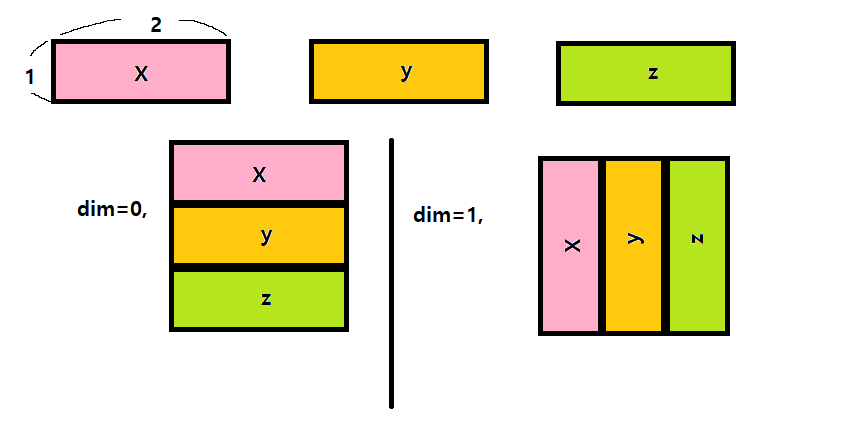

In [ ]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))   # 위에서 dim=0일 때와 동일
print(torch.cat([x.unsqueeze(1), y.unsqueeze(1), z.unsqueeze(1)], dim=1))   # 위에서 dim=1일 때와 동일

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


## Ones and Zeros

In [ ]:
x = torch.FloatTensor([[0,1,2], [2,1,0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [ ]:
print(torch.ones_like(x))
print(torch.zeros_like(x))

''' 이것은 device와 관련해서 쓰이는데,
    gpu 0에서 정의된 텐서를 gpu 1에서 사용하려고 들면 바로 에러가 난다.
    즉, gpu 1에서 gpu 0의 텐서를 쓰고 싶다면 ones나 zeros로 본떠오기가 가능하다.
'''

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


## In-place operation

In [ ]:
x = torch.FloatTensor([[1, 2], [3, 4]])

print(x.mul(2.))
print(x)
print(x.mul_(2.))   # inplace: 수정하다
print(x)

''' mul만 수행하면 계산만 하고 끝난다.
    그런데 mul_이라고 하면 inplace가 적용되어 계산된 값이 return된다.
'''

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


' \n'